In [61]:
#viscosity.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 15 April 2018.
#plot librating ringlet

In [62]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [63]:
#loop over all simulations
folders = ['nu_3e-14/', 'nu_1e-13/', 'nu_3e-13/', 'nu_1e-12/']
linewidths = [12, 6, 4, 2]
colors = ['cyan', 'green', 'red', 'purple']
outputs = []
from helper_fns import *
for folder in folders:
    
    #restore output
    inputs_file = folder + 'inputs.py'
    execfile(inputs_file)
    output_path = folder + output_folder
    r, t, vr, vt, times, lambda0 = restore_output(output_path)
    output = (r, t, vr, vt, times, lambda0, shear_viscosity)
    outputs += [output]
    print 'r.shape = ', r.shape
    print 'total_ring_mass = ', total_ring_mass
    print 'shear_viscosity = ', shear_viscosity
    print 'initial_orbits = ', initial_orbits
    print 'e.min() = ', e.min()
    print 'e.max() = ', e.max()
    print

r.shape =  (551, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  3e-14
initial_orbits =  {'adeda': 0.056575, 'shape': 'eccentric', 'e': 0.005}
e.min() =  0.0030786243096846246
e.max() =  0.006125243720313146

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  1e-13
initial_orbits =  {'adeda': 0.056575, 'shape': 'eccentric', 'e': 0.005}
e.min() =  0.0030786243096846246
e.max() =  0.006125243720313146

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  3e-13
initial_orbits =  {'adeda': 0.056575, 'shape': 'eccentric', 'e': 0.005}
e.min() =  0.0030786243096846246
e.max() =  0.006125243720313146

r.shape =  (1001, 2, 61)
total_ring_mass =  1.5e-09
shear_viscosity =  1e-12
initial_orbits =  {'adeda': 0.056575, 'shape': 'eccentric', 'e': 0.005}
e.min() =  0.0030786243096846246
e.max() =  0.006125243720313146



shear_viscosity =  3e-14
viscous_timescale (10^10) =  0.0027791668402778417
shear_viscosity =  1e-13
viscous_timescale (10^10) =  0.0008337500520833959
shear_viscosity =  3e-13
viscous_timescale (10^10) =  0.0002779166840278405
shear_viscosity =  1e-12
viscous_timescale (10^10) =  8.33750052083961e-05


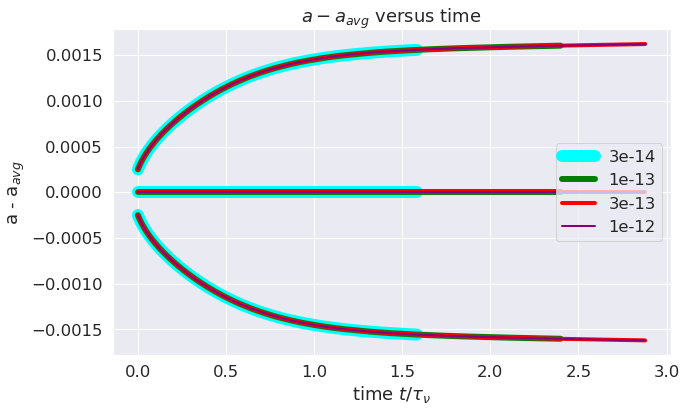

In [74]:
#for each simulation, plot a - a_avg versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute delta_a=a_outer-a_inner versus time
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_inner = a[:, 0, :].mean(axis=1)
    a_avg = (a_inner + a_outer)/2
    delta_a = a_outer - a_inner
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (1.0e-5)*(a_avg[0]**2)/(12*shear_viscosity)
    times_viscous = times/viscous_timescale
    print 'shear_viscosity = ', shear_viscosity
    print 'viscous_timescale (10^10) = ', viscous_timescale/1.0e10
    
    #plot streamline's mutual a-evolution
    x = times_viscous
    y = a_inner - a_avg
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label=lbl)
    y = a_avg - a_avg
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label='')
    y = a_outer - a_avg
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label='')
    p = ax.set_title(r'$a - a_{avg}$ versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel('a - a$_{avg}$')
    p = plt.legend(loc='center right')

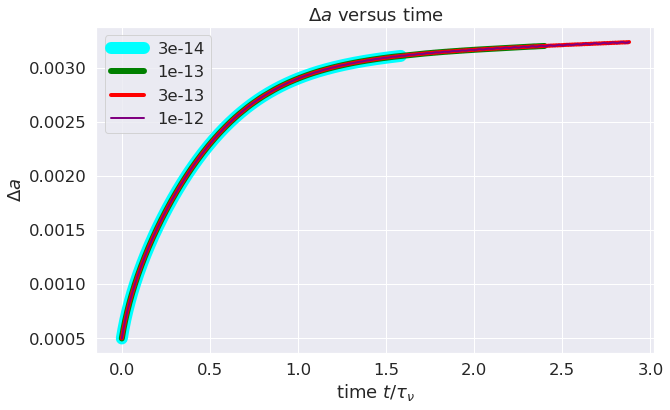

In [75]:
#plot delta_a versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute delta_a=a_outer-a_inner versus time
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_inner = a[:, 0, :].mean(axis=1)
    a_avg = (a_inner + a_outer)/2
    delta_a = a_outer - a_inner
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (1.0e-5)*(a_avg[0]**2)/(12*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's delta_a
    x = times_viscous
    y = delta_a
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label=lbl)
    p = ax.set_title(r'$\Delta a$ versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel(r'$\Delta a$')
    p = plt.legend()

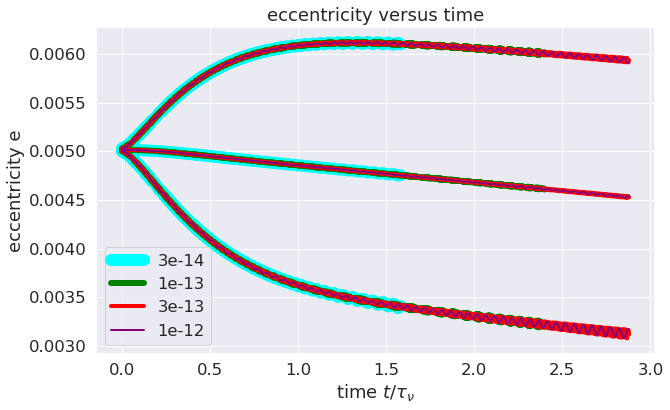

In [76]:
#plot eccentricity versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute delta_a=a_outer-a_inner versus time
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_inner = a[:, 0, :].mean(axis=1)
    a_avg = (a_inner + a_outer)/2
    delta_a = a_outer - a_inner
    
    #compute delta_e=e_outer-e_inner and e_prime = a_avg*delta_e/delta_a versus time
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_inner = e[:, 0, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    delta_e = e_outer - e_inner
    e_prime = a_avg*delta_e/delta_a
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (1.0e-5)*(a_avg[0]**2)/(12*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's mutual e-evolution
    x = times_viscous
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    y = e_outer
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label=lbl)
    y = e_avg
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label='')
    y = e_inner
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label='')
    p = ax.set_title(r'eccentricity versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel('eccentricity e')
    p = plt.legend()

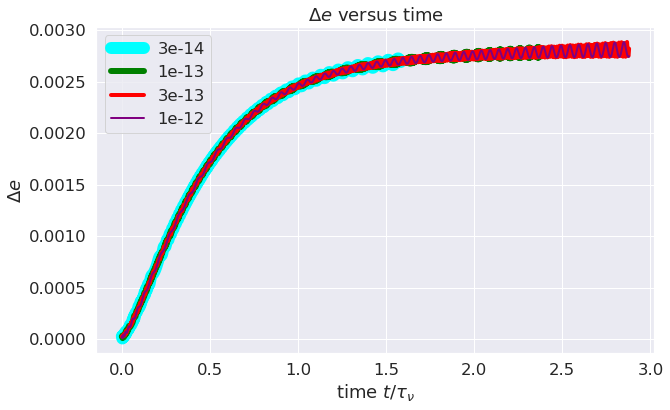

In [78]:
#plot delta_e versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute delta_a=a_outer-a_inner versus time
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_inner = a[:, 0, :].mean(axis=1)
    a_avg = (a_inner + a_outer)/2
    delta_a = a_outer - a_inner
    
    #compute delta_e=e_outer-e_inner and e_prime = a_avg*delta_e/delta_a versus time
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_inner = e[:, 0, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    delta_e = e_outer - e_inner
    e_prime = a_avg*delta_e/delta_a
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (1.0e-5)*(a_avg[0]**2)/(12*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's delta_e
    x = times_viscous
    y = delta_e
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', linewidth=lw, color=clr, label=lbl)
    p = ax.set_title(r'$\Delta e$ versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel(r'$\Delta e$')
    p = plt.legend()

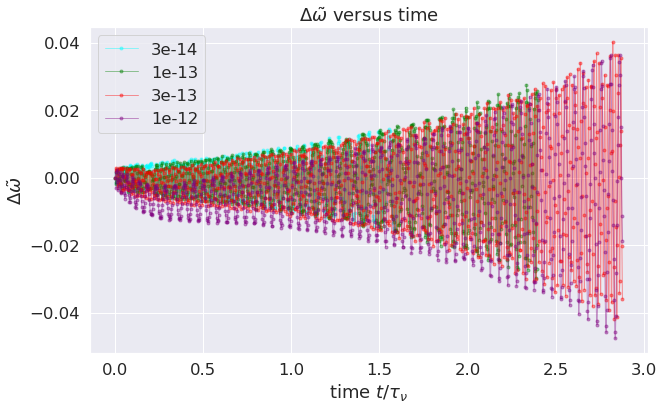

In [85]:
#plot delta_wt versus viscous time
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(folders)):
    
    #convert coordinates to orbit elements
    r, t, vr, vt, times, lambda0, shear_viscosity = outputs[idx]
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    
    #compute delta_a=a_outer-a_inner versus time
    a_outer = a[:, number_of_streamlines-1, :].mean(axis=1)
    a_inner = a[:, 0, :].mean(axis=1)
    a_avg = (a_inner + a_outer)/2
    delta_a = a_outer - a_inner
    
    #compute delta_e=e_outer-e_inner and e_prime = a_avg*delta_e/delta_a versus time
    e_outer = e[:, number_of_streamlines-1, :].mean(axis=1)
    e_inner = e[:, 0, :].mean(axis=1)
    e_avg = (e_inner + e_outer)/2
    delta_e = e_outer - e_inner
    e_prime = a_avg*delta_e/delta_a
    
    #compute delta_w=wt_outer-wt_inner and wt_prime = a_mid*e_mid*delta_wt/delta_a 
    #and q=sqrt(e_prime^2 + wt_prime^2) versus time
    delta_wt_list = []
    for t_idx in range(len(times)):
        s_idx = 0
        r0 = r[t_idx, s_idx]
        theta_idx = np.argmin(r0)
        wt_inner = wt[t_idx, s_idx, theta_idx]
        s_idx = 1
        r0 = r[t_idx, s_idx]
        theta_idx = np.argmin(r0)
        wt_outer = wt[t_idx, s_idx, theta_idx]
        delta_wt_list += [wt_outer - wt_inner]
    delta_wt = adjust_angle(np.array(delta_wt_list))
    
    #time in units of the ring's viscous spreading timescale
    viscous_timescale = (1.0e-5)*(a_avg[0]**2)/(12*shear_viscosity)
    times_viscous = times/viscous_timescale
    
    #plot streamline's delta_wt
    x = times_viscous
    y = delta_wt
    lbl = str(shear_viscosity)
    lw = linewidths[idx]
    clr = colors[idx]
    p = ax.plot(x, y, linestyle='-', marker='o', markersize=3, alpha=0.4, color=clr, 
        linewidth=1, label=lbl)
    p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
    p = ax.set_xlabel(r'time $t/\tau_\nu$')
    p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
    p = plt.legend()

In [12]:

#wt_prime = a_avg*e_avg*delta_wt/delta_a
#q = np.sqrt(e_prime**2 + wt_prime**2)

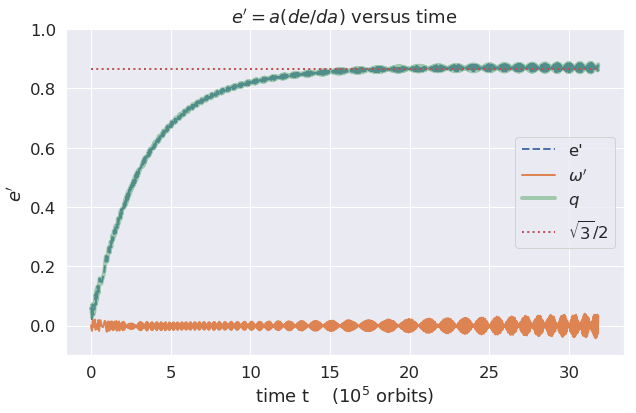

In [14]:
#plot e_prime wt_prime and q versus time
x = times/(2*np.pi)/1.0e5
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='dashed', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r"$\omega'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=4, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'=a(de/da)$ versus time")
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r"$e'$")
p = ax.set_ylim(-0.1, 1)
p = plt.legend()
p = plt.savefig('figs/adeda.png')

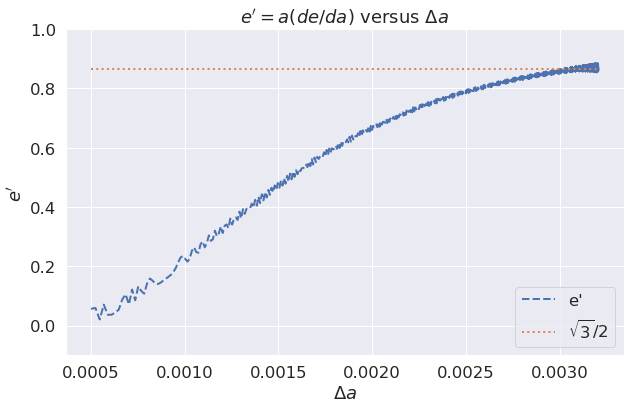

In [15]:
#plot e_prime versus delta_a
x = delta_a
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='dashed', linewidth=2, label="e'")
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'=a(de/da)$ versus $\Delta a$")
p = ax.set_xlabel(r'$\Delta a$')
p = ax.set_ylabel(r"$e'$")
p = ax.set_ylim(-0.1, 1)
p = plt.legend()
#p = plt.savefig('figs/adeda.png')

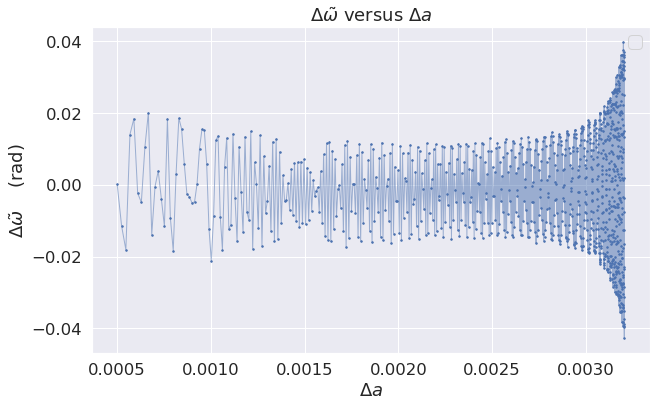

In [16]:
#plot wt_prime versus delta_a
x = delta_a
y = wt_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=1)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
p = ax.plot(x, y, linestyle='none', marker='.', markersize=3, color=colors[0])
p = ax.set_title(r"$\Delta\tilde{\omega}$ versus $\Delta a$")
p = ax.set_xlabel(r'$\Delta a$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
#p = ax.set_ylim(-0.1, 1)
p = plt.legend()
#p = plt.savefig('figs/adeda.png')

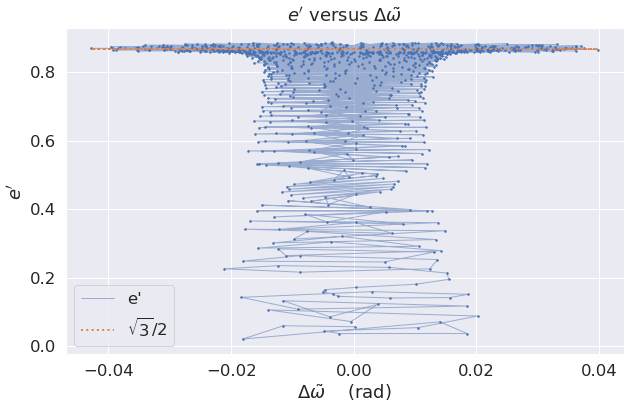

In [17]:
#plot e_prime vs wt_prime
x = wt_prime
y = e_prime
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', alpha=0.5, linewidth=1, label="e'")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
p = ax.plot(x, y, linestyle='none', marker='.', markersize=3, color=colors[0])
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_title(r"$e'$ versus $\Delta\tilde{\omega}$")
p = ax.set_xlabel(r'$\Delta\tilde{\omega}$    (rad)')
p = ax.set_ylabel(r"$e'$")
p = plt.legend()

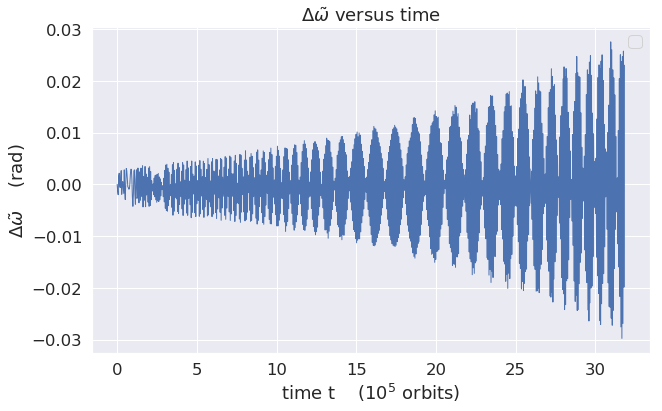

In [18]:
#plot delta_wt versus time
x = times/(2*np.pi)/1.0e5
y = delta_wt
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (rad)')
p = plt.legend()

In [19]:
#viscous angular momentum flux & angular momentum luminosity vs time
c = -1.0
G = -1.0
twopi = 2*np.pi
inner_torque_list = []
outer_torque_list = []
viscous_flux_list = []
for t_idx in range(len(times)):
    Ar, At = accelerations(lambda0, G_ring, shear_viscosity, c, r[t_idx], t[t_idx], vt[t_idx])
    viscous_flux = lambda0*r[t_idx]*At
    torque_per_particle = viscous_flux*(twopi*r[t_idx]/particles_per_streamline)
    viscous_flux_list += [viscous_flux]
    inner_torque_list += [torque_per_particle[0].sum()]
    outer_torque_list += [torque_per_particle[1].sum()]
inner_torque = np.array(inner_torque_list)
outer_torque = np.array(outer_torque_list)
viscous_flux = np.array(viscous_flux_list)

In [20]:
#viscous angular momentum flux & luminosity assuming circular ring at time=0
a0 = a_avg[0]
area = twopi*a0*delta_a[0]
sd0 = total_ring_mass/area
w0 = Omega(J2, Rp, a0)
viscous_flux0 = 1.5*shear_viscosity*sd0*a0*w0
viscous_luminosity0 = viscous_flux0*twopi*a0
print 'circular flux, luminosity = ', viscous_flux0, viscous_luminosity0, outer_torque[0]

circular flux, luminosity =  7.172690204737589e-20 4.507860854278669e-19 2.2620986312096212e-19


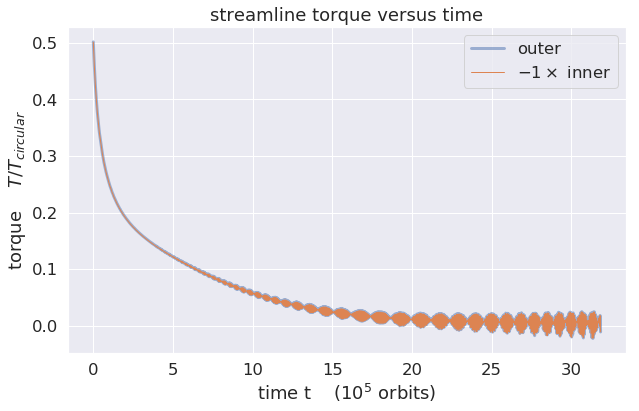

In [21]:
#plot torques versus time...off by X2 at time=0???
f, ax = plt.subplots(figsize=(10, 6))
x = times/(2*np.pi)/1.0e5
y = outer_torque/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=3, label='outer', alpha=0.5)
y = -inner_torque/viscous_luminosity0
p = ax.plot(x, y, linestyle='-', linewidth=1, label=r'$-1\times$ inner')
p = ax.set_title(r'streamline torque versus time')
p = ax.set_xlabel(r'time t    ($10^5$ orbits)')
p = ax.set_ylabel(r'torque    $T/T_{circular}$')
p = plt.legend()

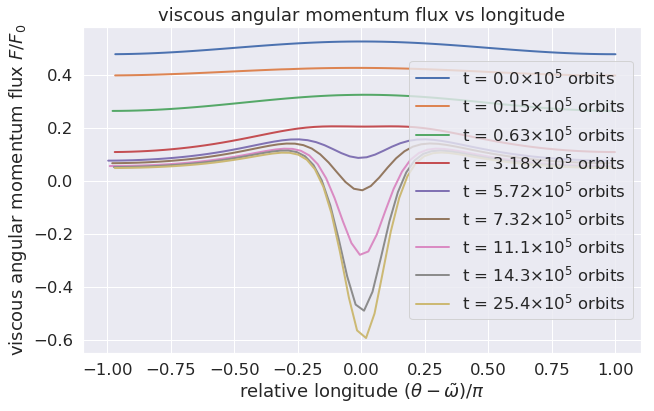

In [22]:
#viscous flux vs longitude...factor of X2 problem???
f, ax = plt.subplots(figsize=(10, 6))
t_idxs = (np.array([0.0, 0.005, 0.02, 0.1, 0.18, 0.23, 0.35, 0.45, 0.8])*total_number_of_outputs)\
    .astype(int)
for t_idx in t_idxs:
    viscous_flux_outer = viscous_flux[t_idx][1]
    r_outer = r[t_idx][1]
    t_outer = t[t_idx][1]
    wt_outer = wt[t_idx][1]
    pidx = r_outer.argmin()
    wt_outer_min = wt_outer[pidx]
    t_rotating = adjust_angle(t_outer - wt_outer_min)
    y = viscous_flux_outer/viscous_flux0
    x = t_rotating/np.pi
    idx = np.argsort(t_rotating)
    x = x[idx]
    y = y[idx]
    N_orbits = times[t_idx]/twopi/1.0e5
    lbl = r't = ' + str(N_orbits)[0:4] + r'$\times10^5$ orbits'
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'viscous angular momentum flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r'viscous angular momentum flux $F/F_0$')
p = plt.legend(loc='center right')